<a href="https://colab.research.google.com/github/gianmarcozironelli/machine_learning/blob/main/ML02_Parametric_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Expectation Maximization for Gaussian Mixture Model
Building a dataset where points are generated form one of two dimensional Gaussian processes. We will draw 3,000 points from distribution with $μ = 20$ and  $\sigma$ = 5, amd 7,000 points from a distribution with the same variance and $μ$ = 40.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

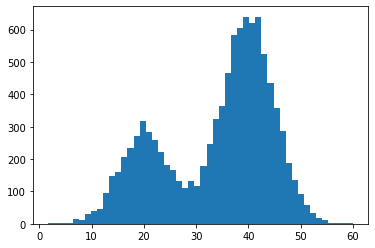

In [17]:
#first distribution
X1 = np.random.normal(loc=20, scale=5, size=3000)
X2 = np.random.normal(loc=40, scale=5, size=7000)
X = np.hstack((X1, X2))

plt.hist(X, bins=50)
plt.show()

We assume we already know it is a bimodal gaussian distirbution with parameters $\theta = (μ_1, \sigma_1, μ_2, \sigma_2)$. We randomly initialize al of them.

In [18]:
params = {'mu1' : np.random.normal(30,10),
          'mu2' : np.random.normal(30,10),
          'sigma1' : np.random.uniform(1, 10),
          'sigma2' : np.random.uniform(1, 10)}

print(params)

{'mu1': 30.996316833710875, 'mu2': 43.1384622439173, 'sigma1': 2.8990558371104838, 'sigma2': 1.3314948523461463}


##Expectation (E-step)
For each sample point, compute the weight as the probability to belong o the first distribution with respect to the second.
How much is the probability of a sample to belong to one class (distribution) instead of another?

In [19]:
p1 = norm.pdf(X, params['mu1'], params['sigma1'])
p2 = norm.pdf(X, params['mu2'], params['sigma2'])

#or p1 = np.log(norm.pdf(X, params['mu1'], params['sigma1']))

w = np.divide(p1, p1+p2)

##Maximization (M-step)
Find the maximum likelihood estimate of the weighted log-likelihood function for the two distributions.

In [20]:
mu1_new = np.sum(w*X) / np.sum(w)
mu2_new = np.sum((1-w)*X) / np.sum(1-w)
sigma1 = math.sqrt(np.sum(w* np.power(X-params['mu1']*np.ones(len(X)), 2)) / np.sum(w))
sigma2 = math.sqrt(np.sum((1-w)* np.power(X-params['mu2']*np.ones(len(X)), 2)) / np.sum(1-w))

print(mu1_new, mu2_new, sigma1, sigma2)

27.900636183160408 43.380934785023335 9.35432583745096 3.1371041912233806


##Running EM

Iteration 0 :
{'mu1': 25.919427465940604, 'mu2': 41.22454562986323, 'sigma1': 9.239831922823978, 'sigma2': 4.296229852291771}
-2.9342642463378454
Iteration 1 :
{'mu1': 25.882238814420173, 'mu2': 41.22534067172759, 'sigma1': 9.214400461049781, 'sigma2': 4.3007090382539}
-2.9342410890028523


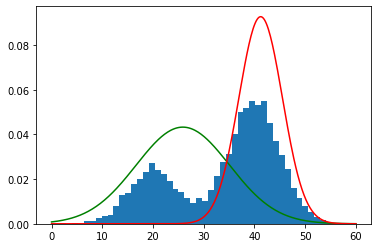

In [23]:
#Threshold = how much is the minimum increase of the log likelihood
#if it increase less then I'll stop
th = 0.001
counter = 0
Lold = -30
Lnew = -20

while Lnew - Lold > th :
  print('Iteration', str(counter), ':')
  counter += 1
  Lold = Lnew

  #E-step:
  p1 = norm.pdf(X, params['mu1'], params['sigma1'])
  p2 = norm.pdf(X, params['mu2'], params['sigma2'])
  w = np.divide(p1, p1+p2)

  Lnew = np.sum(np.log(p1+p2)) / len(X)

  #M-step:
  params['mu1'] = np.sum(w*X) / np.sum(w)
  params['mu2'] = np.sum((1-w)*X) / np.sum(1-w)
  params['sigma1'] = math.sqrt(np.sum(w* np.power(X-params['mu1']*np.ones(len(X)), 2)) / np.sum(w))
  params['sigma2'] = math.sqrt(np.sum((1-w)* np.power(X-params['mu2']*np.ones(len(X)), 2)) / np.sum(1-w))

  print(params)
  print(Lnew)

xs = np.linspace(0, 60, 300)
y1 = norm.pdf (xs, params['mu1'], params['sigma1'])
y2 = norm.pdf (xs, params['mu2'], params['sigma2'])

#plot the histograms
plt.hist(X, bins = 50, density=True)
plt.plot(xs, y1, 'g')
plt.plot(xs, y2, 'r')

plt.show()